In [27]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as scipy
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid", {'axes.grid' : False})
import datetime
import warnings
warnings.filterwarnings('ignore')
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
cRange = ['#475468', '#e7e6e6', '#4b73be', '#df8244', '#a5a5a5', '#f7c143',
          '#20406a', '#deeef8', '#2d6fc0', '#409cd4', '#5ccdd7', '#5ecb9e',
          '#a53218', '#c59933', '#f08a40', '#aa4f30', '#f7bf5d', '#d85733',
          '#728083', '#8babb4', '#7196ad', '#607397', '#8585c2', '#a687c1']
colors = ['#475468', '#e7e6e6', '#4b73be', 
          '#df8244', '#a5a5a5', '#f7c143'] 
cmapOffice = mpl.colors.ListedColormap([cRange[i] for i in range(0, 5)])
cmapBlue = mpl.colors.ListedColormap([cRange[i] for i in range(6, 11)])
cmapRed = mpl.colors.ListedColormap([cRange[i] for i in range(12, 17)])
cmapViolett = mpl.colors.ListedColormap([cRange[i] for i in range(18, 23)])



Current correlation method is: pearson
(can be emtpy) Current label prefix is: 



Correlation of Price Difference & Wind Forecast Error: -0.3940734957646056
Correlation of Price Difference & Solar Forecast Error: -0.21789173437621973
Correlation of Price Difference & Total Forecast Error: -0.44817361320180726


Total_FE: Ttest_indResult(statistic=-7.989127298000389, pvalue=1.4002168569645373e-15)
Total_FE: Ttest_relResult(statistic=-7.974382305829369, pvalue=1.6249951868059867e-15)


Wind_FE: Ttest_indResult(statistic=-11.042992533979676, pvalue=2.6389280873882815e-28)
Wind_FE: Ttest_relResult(statistic=-11.023238014814847, pvalue=3.6529655657385303e-28)


Solar_FE: Ttest_indResult(statistic=4.9120345963957, pvalue=9.054132378579567e-07)
Solar_FE: Ttest_relResult(statistic=4.90144562882659, pvalue=9.598369068156245e-07)


Correlation on first order differences: -0.15165136617557934
Correlation on mov_avg_30: -0.6448078034726219


FirstOrderDiffs -- ttest: Ttest_indResult(statistic=n

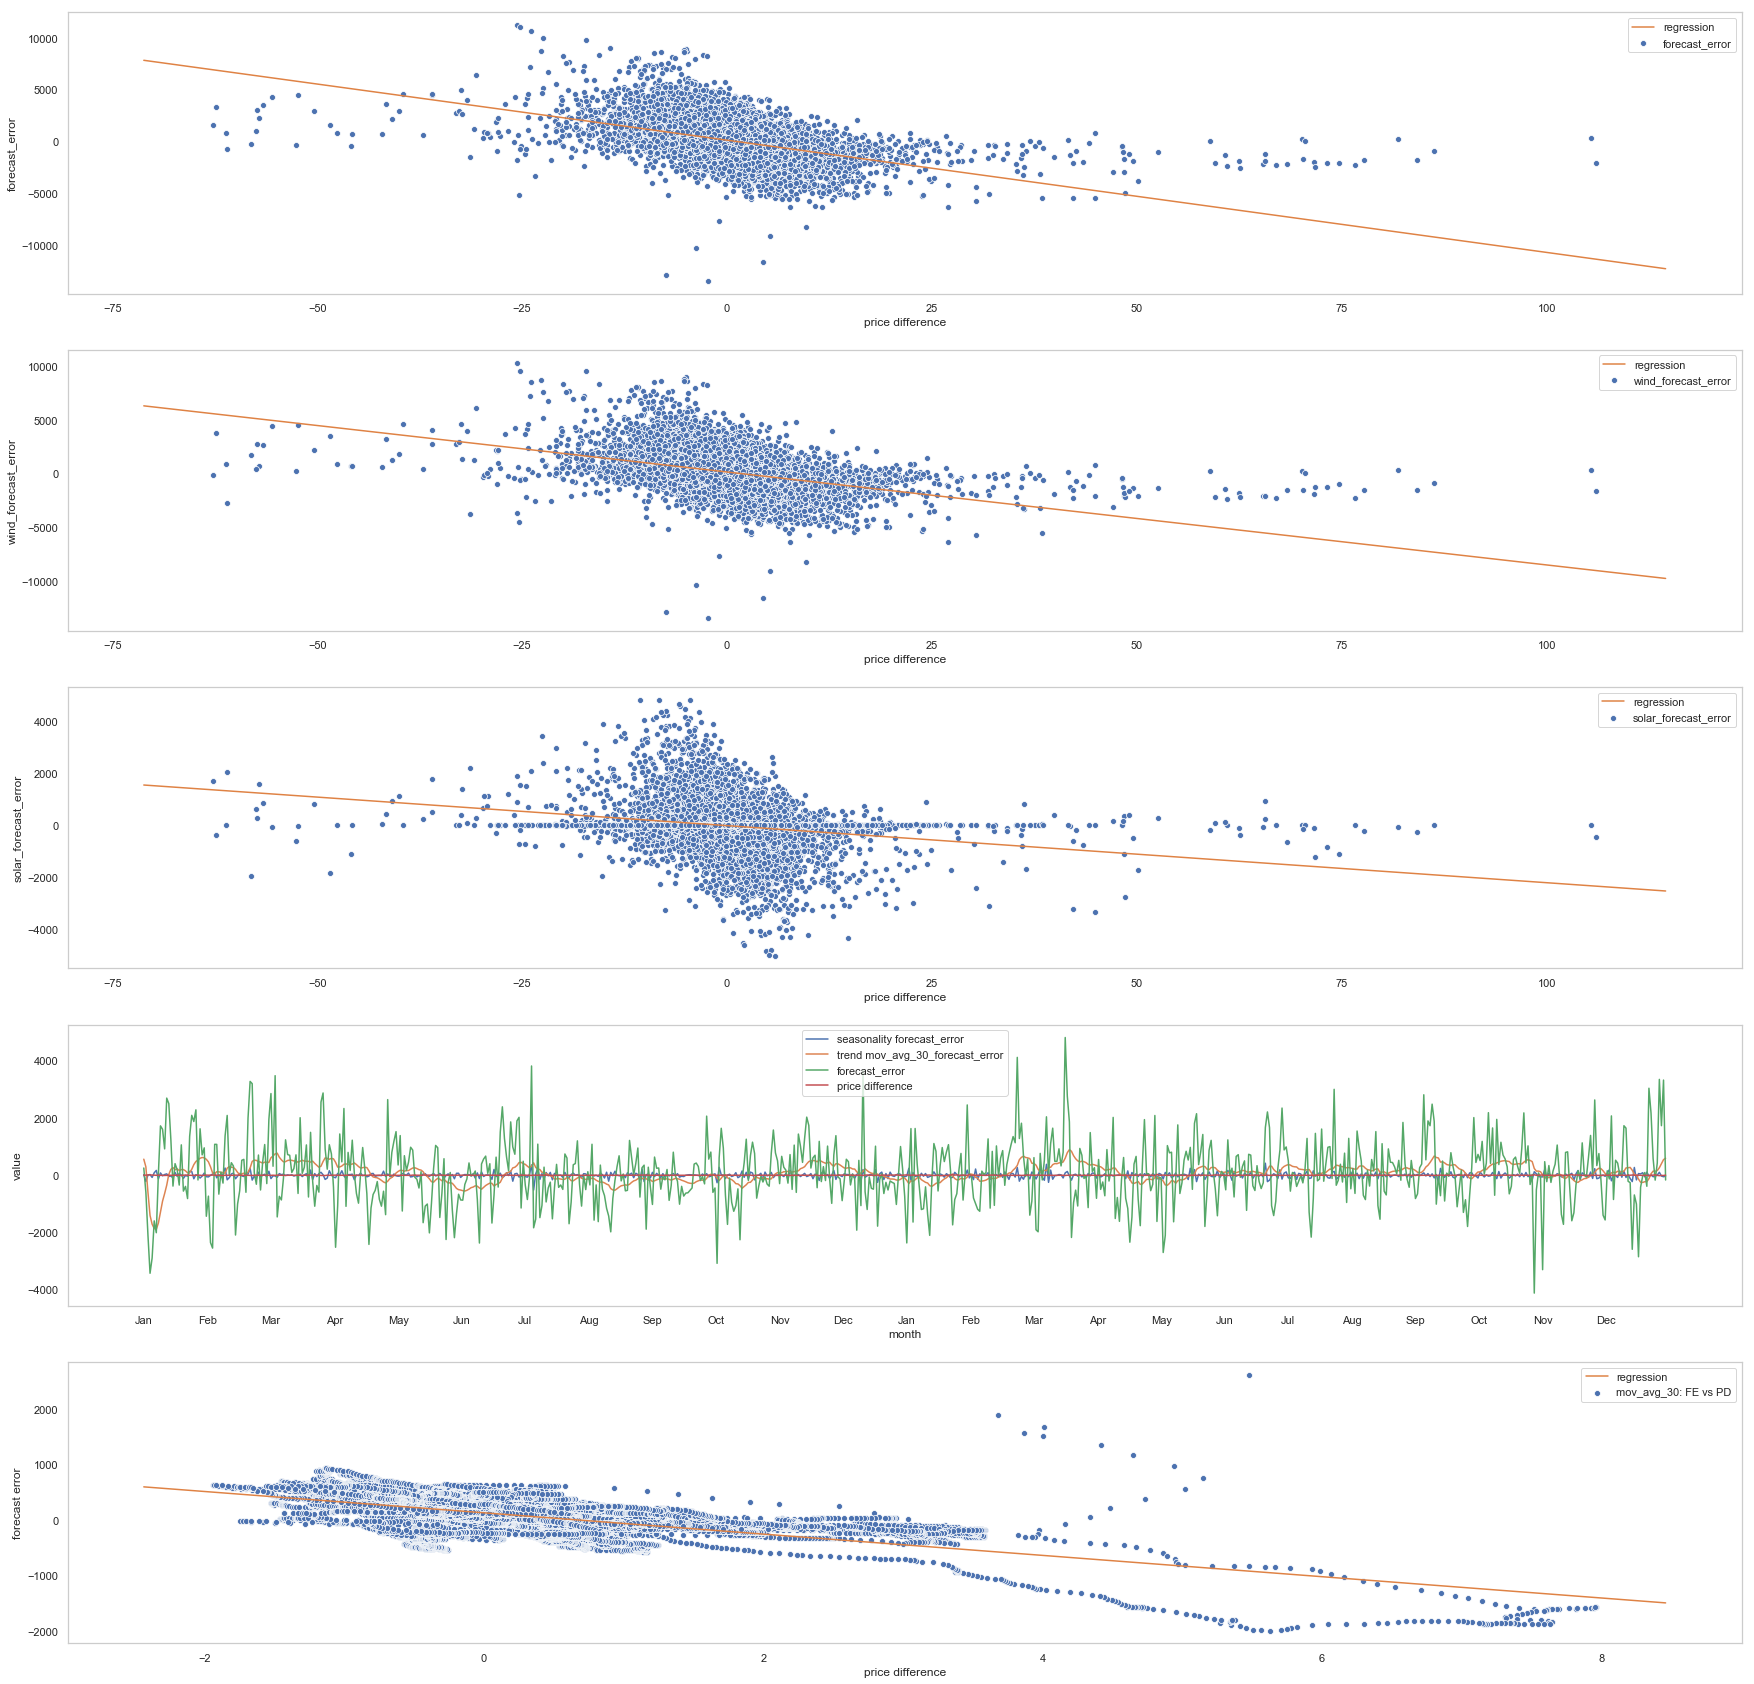

In [147]:
fullData = pd.read_csv("../00_data/data_with_calc_fields.csv", sep=";", decimal=",", index_col="datetime")
fullData.index = pd.to_datetime(fullData.index)

fullData["mov_avg_30_price_diff"] = fullData["price_diff"].ewm(span=30*24,  min_periods=1).mean()

corrMethod = "pearson" # pearson // spearman // kendall

labelPrefix = "" # e.g. mov_avg_30_ // or leave empty (no space)
forecastErrorLabel_total = labelPrefix + "forecast_error"
forecastErrorLabel_wind = labelPrefix + "wind_forecast_error"
forecastErrorLabel_solar = labelPrefix + "solar_forecast_error"

print("\n")
print("Current correlation method is: " + corrMethod)
print("(can be emtpy) Current label prefix is: " + labelPrefix)
print("\n\n")

series_forecastError_wind = fullData[forecastErrorLabel_wind]
series_forecastError_solar = fullData[forecastErrorLabel_solar]
series_forecastError_total = fullData[forecastErrorLabel_total]
series_priceDifference = fullData["price_diff"]

corrCoeff_price_wind = series_priceDifference.corr(series_forecastError_wind, method=corrMethod)
corrCoeff_price_solar = series_priceDifference.corr(series_forecastError_solar, method=corrMethod)
corrCoeff_price_total = series_priceDifference.corr(series_forecastError_total, method=corrMethod)

print("Correlation of Price Difference & Wind Forecast Error: " + str(corrCoeff_price_wind))
print("Correlation of Price Difference & Solar Forecast Error: " + str(corrCoeff_price_solar))
print("Correlation of Price Difference & Total Forecast Error: " + str(corrCoeff_price_total))

slope_total, intercept_total, rvalue_total, pvalue_total, stderr_total = linregress(series_priceDifference, series_forecastError_total)
slope_wind, intercept_wind, rvalue_wind, pvalue_wind, stderr_wind = linregress(series_priceDifference, series_forecastError_wind)
slope_solar, intercept_solar, rvalue_solar, pvalue_solar, stderr_solar = linregress(series_priceDifference, series_forecastError_solar)

print("\n")
print("Total_FE: " + str(scipy.ttest_ind(series_priceDifference, series_forecastError_total)))
print("Total_FE: " + str(scipy.ttest_rel(series_priceDifference, series_forecastError_total)))
print("\n")
print("Wind_FE: " + str(scipy.ttest_ind(series_priceDifference, series_forecastError_wind)))
print("Wind_FE: " + str(scipy.ttest_rel(series_priceDifference, series_forecastError_wind)))
print("\n")
print("Solar_FE: " + str(scipy.ttest_ind(series_priceDifference, series_forecastError_solar)))
print("Solar_FE: " + str(scipy.ttest_rel(series_priceDifference, series_forecastError_solar)))
      

#####
# fullData["pearson_predict_total"] = fullData[forecastErrorLabel_total].map(lambda x: x * corrCoeff_price_total_P)
# fullData["pearson_predict_solar"] = fullData[forecastErrorLabel_solar].map(lambda x: x * corrCoeff_price_solar)
# fullData["kendall_predict_total"] = fullData[forecastErrorLabel_total].map(lambda x: x * corrCoeff_price_total_K)
# fullData["spearman_predict_total"] = fullData[forecastErrorLabel_total].map(lambda x: x * corrCoeff_price_total_S)
#####

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(30, 30), sharex=False)

sns.scatterplot(x="price_diff", y=forecastErrorLabel_total, data=fullData, ax=ax1, label=forecastErrorLabel_total, ci=None)
sns.scatterplot(x="price_diff", y=forecastErrorLabel_wind, data=fullData, ax=ax2, label=forecastErrorLabel_wind, ci=None)
sns.scatterplot(x="price_diff", y=forecastErrorLabel_solar, data=fullData, ax=ax3, label=forecastErrorLabel_solar, ci=None)

# total
x_vals_total = np.array(ax1.get_xlim())
y_vals_total = intercept_total + slope_total * x_vals_total
sns.lineplot(x=x_vals_total, y=y_vals_total, ax=ax1, label="regression", ci=None)

ax1.legend()
ax1.set_xlabel("price difference")
ax1.set_ylabel(forecastErrorLabel_total)
# ax1.set_xticks(np.arange(720, step=30.5))
# ax1.set_xticklabels(2*[month for month in months])
for child in ax1.findobj(Line2D):
    if child.get_label() == "regression":
        child.set_color(cRange[3])
#     elif child.get_label() == "price_diff":
#         child.set_color(cRange[4])
#     elif child.get_label() == "pearson_predict_total":
#         child.set_color(cRange[12])

# wind
x_vals_wind = np.array(ax2.get_xlim())
y_vals_wind = intercept_wind + slope_wind * x_vals_wind
sns.lineplot(x=x_vals_wind, y=y_vals_wind, ax=ax2, label="regression", ci=None)

ax2.legend()
ax2.set_xlabel("price difference")
ax2.set_ylabel(forecastErrorLabel_wind)
# ax2.set_xticks(np.arange(720, step=30.5))
# ax2.set_xticklabels(2*[month for month in months])
for child in ax2.findobj(Line2D):
    if child.get_label() == "regression":
        child.set_color(cRange[3])
#     elif child.get_label() == "price_diff":
#         child.set_color(cRange[4])
#     elif child.get_label() == "pearson_predict_total":
#         child.set_color(cRange[12])

# solar
x_vals_solar = np.array(ax3.get_xlim())
y_vals_solar = intercept_solar + slope_solar * x_vals_solar
sns.lineplot(x=x_vals_solar, y=y_vals_solar, ax=ax3, label="regression", ci=None)

ax3.legend()
ax3.set_xlabel("price difference")
ax3.set_ylabel(forecastErrorLabel_solar)
# ax3.set_xticks(np.arange(720, step=30.5))
# ax3.set_xticklabels(2*[month for month in months])
for child in ax3.findobj(Line2D):
    if child.get_label() == "regression":
        child.set_color(cRange[3])
#     elif child.get_label() == "price_diff":
#         child.set_color(cRange[4])
#     elif child.get_label() == "pearson_predict_total":
#         child.set_color(cRange[12])

# some more plot stuff
selectiveData = fullData[["price_diff", "forecast_error", "wind_forecast_error", "solar_forecast_error"]]
selectiveData = selectiveData.diff()
selectiveData["date"] = fullData["date"]

# data_FE_total = fullData[["date", forecastErrorLabel_total]]
# data_FE_total[forecastErrorLabel_total] = data_FE_total[forecastErrorLabel_total].diff()

sns.lineplot(x="date", y="forecast_error", data=selectiveData, ax=ax4, label="seasonality forecast_error", ci=None)
sns.lineplot(x="date", y="mov_avg_30_forecast_error", data=fullData, ax=ax4, label="trend mov_avg_30_forecast_error", ci=None)
sns.lineplot(x="date", y=forecastErrorLabel_total, data=fullData, ax=ax4, label=forecastErrorLabel_total, ci=None)
# sns.lineplot(x="date", y="price_diff", data=selectiveData, ax=ax4, label="seasonality price difference", ci=None)
sns.lineplot(x="date", y="price_diff", data=fullData, ax=ax4, label="price difference", ci=None)
# sns.lineplot(x="date", y="mov_avg_30_price_diff", data=fullData, ax=ax4, label="mov_avg_30_price_difference", ci=None)

# # sns.lineplot(x="date", y=forecastErrorLabel_solar, data=fullData, ax=ax, label=forecastErrorLabel_solar, ci=None)
# # sns.lineplot(x="date", y=forecastErrorLabel_wind, data=fullData, ax=ax, label=forecastErrorLabel_wind, ci=None)
# sns.lineplot(x="date", y="price_diff", data=fullData, ax=ax, label="price_diff", ci=None)
# sns.lineplot(x="date", y="pearson_predict_total", data=fullData, ax=ax, label="prediction_total", ci=None)
# # sns.lineplot(x="date", y="pearson_predict_solar", data=fullData, ax=ax, label="prediction_solar", ci=None)

ax4.legend()
ax4.set_xlabel("month")
ax4.set_ylabel("value")
ax4.set_xticks(np.arange(720, step=30.5))
ax4.set_xticklabels(2*[month for month in months])

# ax5
# sns.scatterplot(x="price_diff", y="forecast_error", data=selectiveData, ax=ax5, label="FE vs PD", ci=None)
sns.scatterplot(x="mov_avg_30_price_diff", y="mov_avg_30_forecast_error", data=fullData, ax=ax5, label="mov_avg_30: FE vs PD", ci=None)

slope_avg, intercept_avg, rvalue_avg, pvalue_avg, stderr_avg = linregress(fullData["mov_avg_30_price_diff"], fullData["mov_avg_30_forecast_error"])
x_vals_avg = np.array(ax5.get_xlim())
y_vals_avg = intercept_avg + slope_avg * x_vals_avg
sns.lineplot(x=x_vals_avg, y=y_vals_avg, ax=ax5, label="regression", ci=None)

ax5.legend()
ax5.set_xlabel("price difference")
ax5.set_ylabel("forecast error")
for child in ax5.findobj(Line2D):
    if child.get_label() == "regression":
        child.set_color(cRange[3])

corr_on_diff = selectiveData["forecast_error"].corr(selectiveData["price_diff"])
corr_on_movAvg_30 = fullData["mov_avg_30_forecast_error"].corr(fullData["mov_avg_30_price_diff"])
print("\n")
print("Correlation on first order differences: " + str(corr_on_diff))
print("Correlation on mov_avg_30: " + str(corr_on_movAvg_30))

print("\n")
print("FirstOrderDiffs -- ttest: " + str(scipy.ttest_ind(selectiveData["price_diff"], selectiveData["forecast_error"])))
print("FirstOrderDiffs -- ttest: " + str(scipy.ttest_rel(selectiveData["price_diff"], selectiveData["forecast_error"])))
print("\n")
print("MovAvg30 -- ttest: " + str(scipy.ttest_ind(fullData["mov_avg_30_price_diff"], fullData["mov_avg_30_forecast_error"])))
print("MovAvg30 -- ttest: " + str(scipy.ttest_rel(fullData["mov_avg_30_price_diff"], fullData["mov_avg_30_forecast_error"])))

# Conclusion

Since the correlation coefficient is negative, a positive addition to the forecast error leads to a negative addition to the price difference.
         
- Positive addition to the FE (increase in production or reduction of forecasted amount) leads to negative addition to the PD:
    - PD was >= 0: (price increases toward intraday)
        - price increases less // PD might shift from being >= 0 to being < 0 --> then: price decreases & PD < 0
    - PD was < 0:(price decreases toward intraday)
        - price decrease more (PD stays in the range of < 0)
- Negative addition to the FE (reduction in production or increase of forecasted amount) leads to positive addition to the PD:
    - PD was >= 0: (price increases toward intraday)
        - price increases more (PD stays in the range >= 0)
    - PD was < 0:(price decreases toward intraday)
        - price decreases less // PD might shift from being < 0 to being >= 0 --> then: price increases & PD >= 0    
        
        
For the first order differences (i.e. seasonality component) the correlation between FE and PD is lower than the "full" correlation.

For the mov_avg_30 (i.e. trend component) the correlation between FE and PD is higher than the "full" correlation.

==> assumption: the trend component has a higher influence than the seasonality component.